In [1]:
import os
os.chdir('mmpose')

In [ ]:
!python tools/train.py data/rtmpose-s-Dog_hip.py

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [17]:
# 日志文件路径
log_path = 'work_dirs/rtmpose-s-Dog_hip/20240708_165414/vis_data/scalars.json'


In [18]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [19]:
len(json_list)

1220

In [20]:
eval(json_list[4])

{'base_lr': 0.0008421368421052633,
 'lr': 0.0008421368421052633,
 'data_time': 0.8740640163421631,
 'loss': 0.20611968338489534,
 'loss_kpt': 0.20611968338489534,
 'acc_pose': 0.09375,
 'time': 0.9941054344177246,
 'epoch': 1,
 'iter': 5,
 'memory': 878,
 'step': 5}

In [21]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████| 1220/1220 [00:01<00:00, 730.40it/s]


In [22]:
df_train

,base_lr,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,step
0,4.000000e-08,4.000000e-08,1.124815,0.211906,0.211906,0.031250,1.351623,1.0,1.0,831.0,1.0
1,2.105642e-04,2.105642e-04,0.835129,0.209159,0.209159,0.016667,0.997604,1.0,2.0,878.0,2.0
2,4.210884e-04,4.210884e-04,0.795608,0.209067,0.209067,0.015625,0.934207,1.0,3.0,878.0,3.0
3,6.316126e-04,6.316126e-04,0.870671,0.208206,0.208206,0.062500,0.997405,1.0,4.0,878.0,4.0
4,8.421368e-04,8.421368e-04,0.874064,0.206120,0.206120,0.093750,0.994105,1.0,5.0,878.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1195,2.006511e-04,2.006511e-04,0.749027,0.092091,0.092091,0.406250,0.846594,200.0,1196.0,878.0,1196.0
1196,2.004167e-04,2.004167e-04,0.742996,0.092103,0.092103,0.343750,0.840426,200.0,1197.0,878.0,1197.0
1197,2.002344e-04,2.002344e-04,0.745908,0.092351,0.092351,0.312500,0.843245,200.0,1198.0,878.0,1198.0
1198,2.001042e-04,2.001042e-04,0.743548,0.092346,0.092346,0.296875,0.840867,200.0,1199.0,878.0,1199.0


In [23]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.404762,0.246577,0.510982,0.293492,0.333373,10.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.130952,0.094048,0.550721,0.270426,0.306863,20.0
2,0.000175,0.000752,0.0,0.000000,0.000243,0.007143,0.023810,0.0,0.000000,0.008000,0.369048,0.251786,0.512287,0.272591,0.309769,30.0
3,0.000208,0.000521,0.0,0.000000,0.000440,0.004762,0.011905,0.0,0.000000,0.005333,0.142857,0.124107,0.540729,0.261796,0.300824,40.0
4,0.001132,0.006365,0.0,0.002376,0.001980,0.003571,0.023810,0.0,0.011111,0.002667,0.422619,0.238839,0.550078,0.262511,0.301409,50.0
5,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.345238,0.208631,0.535058,0.265976,0.302432,60.0
6,0.001410,0.004794,0.0,0.000000,0.005194,0.021429,0.059524,0.0,0.000000,0.024000,0.452381,0.330060,0.523961,0.265380,0.303673,70.0
7,0.004032,0.028465,0.0,0.001980,0.006617,0.017857,0.119048,0.0,0.011111,0.018667,0.455357,0.329762,0.519832,0.277617,0.315181,80.0
8,0.000990,0.007426,0.0,0.000000,0.001980,0.003571,0.023810,0.0,0.000000,0.004000,0.476190,0.309375,0.496976,0.270476,0.309490,90.0
9,0.005454,0.025743,0.0,0.009604,0.007625,0.042857,0.154762,0.0,0.077778,0.038667,0.476190,0.345685,0.467744,0.258760,0.299902,100.0


In [24]:

df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

In [25]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [26]:
df_train.columns

Index(['base_lr', 'lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time',
       'epoch', 'iter', 'memory', 'step'],
      dtype='object')

In [27]:
metrics = ['loss', 'loss_kpt']

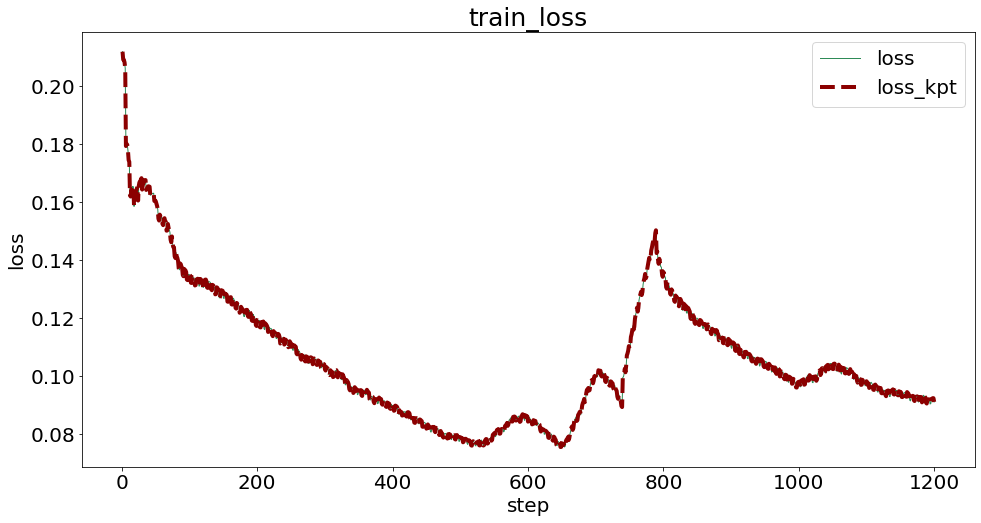

In [28]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('train_loss.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [15]:
metrics = ['acc_pose']

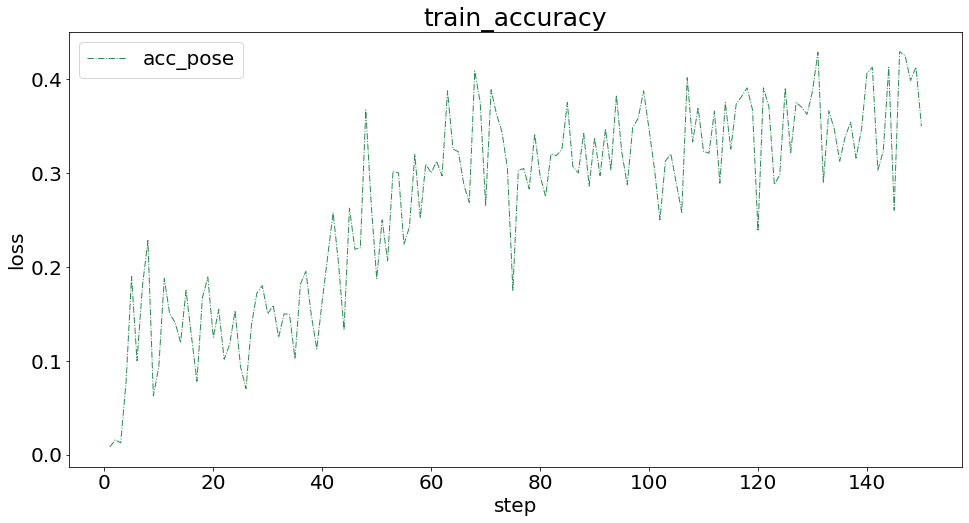

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('train_accuracy.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()